# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Group Project: Tanzania Waterpoint Repair & Analysis

---

## Problem Statement

---

## Data Cleaning & EDA

> ###  Water Pump Dataset

In [11]:
#Imports:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
#Reading in waterpoint csv:
df = pd.read_csv('./data_sb/og_water_data.csv')
target = pd.read_csv('./data_sb/og_water_target.csv')
sub_test = pd.read_csv('./data_sb/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')

In [13]:
#Checking for nulls in training set:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [14]:
#df EDA:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [15]:
#df EDA:
df['population'].mean()

179.90998316498317

In [16]:
df_joined = pd.concat([df,target], axis=1)

In [17]:
#General proportions of functional/non funtional/functional needs repair:
target['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [18]:

#Creating a functionality dataframe by region:
function = pd.DataFrame()
function['region']=list(df['region'].unique())
function['functional_percentage']=[round(df_joined[df_joined['region'] == i]['status_group'].value_counts(normalize=True)[0]*100,1) for i in list(df['region'].unique())] 
function['non_functional_percentage']=[round(df_joined[df_joined['region'] == i]['status_group'].value_counts(normalize=True)[1]*100,1) for i in list(df['region'].unique())] 
function['functional_need_repair_percentage']=[round(df_joined[df_joined['region'] == i]['status_group'].value_counts(normalize=True)[2]*100,1) for i in list(df['region'].unique())] 
function['waterpoint_counts']= list(df_joined['region'].value_counts())
function.to_csv('./cleaned_data_sb/functional.csv')
function

,region,functional_percentage,non_functional_percentage,functional_need_repair_percentage,waterpoint_counts
0,Iringa,78.2,19.5,2.3,5294
1,Mara,52.0,45.0,3.0,4982
2,Manyara,62.3,31.6,6.1,4639
3,Mtwara,62.4,30.3,7.3,4379
4,Kagera,52.1,38.8,9.2,4006
5,Tanga,56.4,40.8,2.9,3350
6,Shinyanga,56.0,31.3,12.7,3316
7,Tabora,54.4,43.3,2.3,3102
8,Pwani,59.1,39.6,1.4,2816
9,Ruvuma,56.1,37.7,6.2,2640


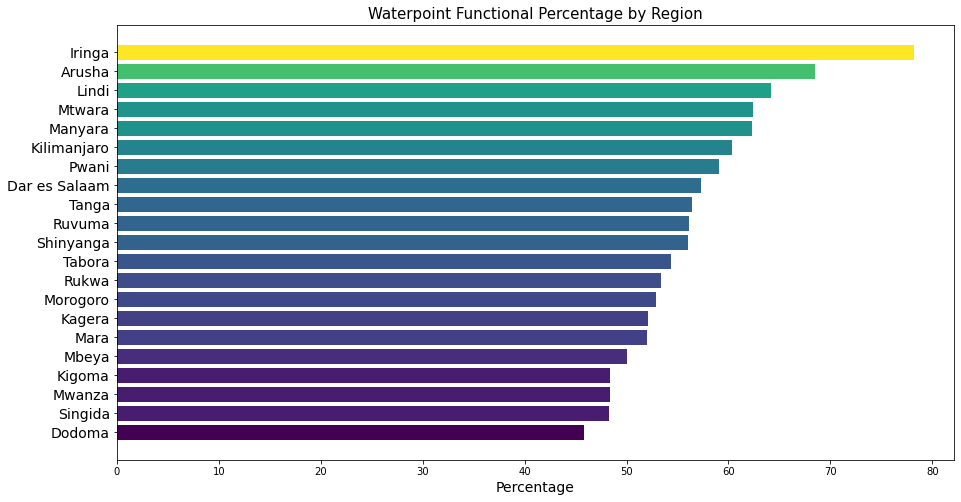

In [19]:
plt.figure(figsize=(15,8))

y = function.sort_values('functional_percentage')['functional_percentage']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.barh(function.sort_values('functional_percentage')['region'],
         function.sort_values('functional_percentage')['functional_percentage'], color=my_cmap(rescale(y)));
plt.title('Waterpoint Functional Percentage by Region', fontsize=15);
plt.xlabel('Percentage', fontsize=14);
plt.yticks(fontsize=14);
plt.savefig('./visualizations_sb/wtp_func_per.png', transparent=True, bbox_inches = 'tight')

- This plot shows that Iringa has the highest percentage of functional wells.
- Dodoma has the lowest percentage of functional wells.

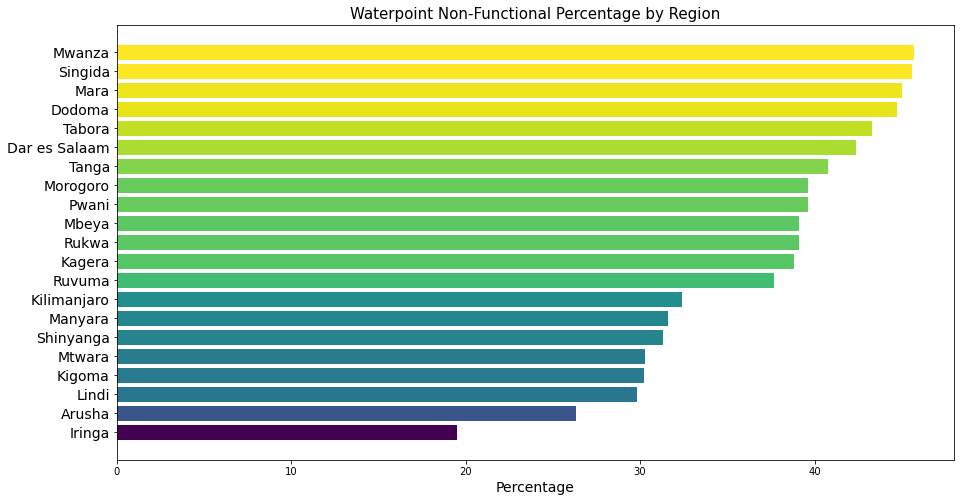

In [20]:
plt.figure(figsize=(15,8))

y = function.sort_values('non_functional_percentage')['non_functional_percentage']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.barh(function.sort_values('non_functional_percentage')['region'],
         function.sort_values('non_functional_percentage')['non_functional_percentage'], color=my_cmap(rescale(y)));
plt.title('Waterpoint Non-Functional Percentage by Region', fontsize=15);
plt.xlabel('Percentage', fontsize=14);
plt.yticks(fontsize=14);
plt.savefig('./visualizations_sb/wtp_nonfunc_per.png', transparent=True, bbox_inches = 'tight')

- This plot shows that Mwanza has the highest percentage of non-functional wells.
- Iringa has the lowest percentage of non-functional wells.

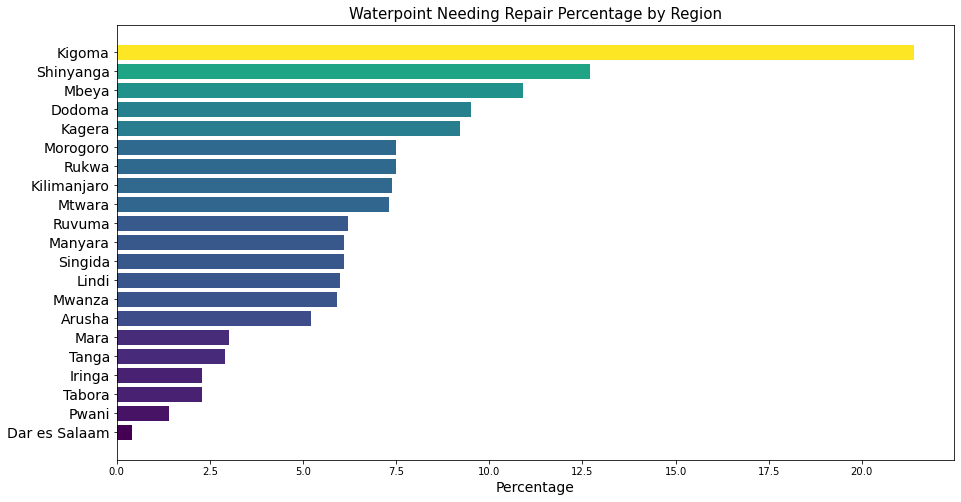

In [21]:
plt.figure(figsize=(15,8))

y = function.sort_values('functional_need_repair_percentage')['functional_need_repair_percentage']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))


plt.barh(function.sort_values('functional_need_repair_percentage')['region'],
         function.sort_values('functional_need_repair_percentage')['functional_need_repair_percentage'], color=my_cmap(rescale(y)));
plt.title('Waterpoint Needing Repair Percentage by Region', fontsize=15);
plt.xlabel('Percentage', fontsize=14);
plt.yticks(fontsize=14);
plt.savefig('./visualizations_sb/wtp_repair_per.png', transparent=True, bbox_inches = 'tight')

- This plot shows that Kigoma has the highest percentage of functional wells needing repair.
- Dar es Salaam has the lowest percentage of functional wells needing repair.

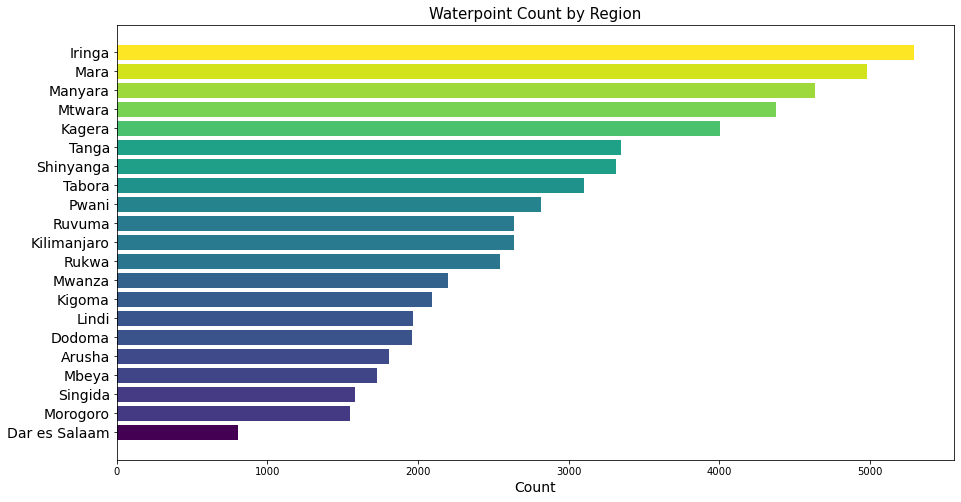

In [22]:
plt.figure(figsize=(15,8))

y = function.sort_values('waterpoint_counts')['waterpoint_counts']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))


plt.barh(function.sort_values('waterpoint_counts')['region'],
         function.sort_values('waterpoint_counts')['waterpoint_counts'], color=my_cmap(rescale(y)));
plt.title('Waterpoint Count by Region', fontsize=15);
plt.xlabel('Count', fontsize=14);
plt.yticks(fontsize=14);
plt.savefig('./visualizations_sb/wtp_count.png', transparent=True, bbox_inches = 'tight')

- This plot shows that Iringa has the greatest number of water points.
- Dar es Salaam has the lowest number of water points. 

> ### Climate Report Precipitation Dataset
> - #### Precipitation Analysis by Region:

In [3]:
#Reading in Climate Report Precipitation dataset:
pr_df = pd.read_csv('../data_sb/pr_timeseries_annual_cru_1901-2020_TZA.csv', header=[1])
pr_df = pr_df.set_index('Unnamed: 0')
pr_df['year'] = pr_df.index

In [4]:
pr_df = pr_df.drop(columns=['Kaskazini Pemba','Kaskazini Unguja', 'Kusini Pemba', 'Kusini Unguja', 'Mjini Magharibi','Geita','Katavi','Njombe','Simiyu'])

In [5]:
#Creating subset of data for only the last 20 years:
pr_df1 = pr_df[pr_df['year'] > 1999]

In [6]:
#Creating new df with 5 year averages for last two years:
avg_pr_df = pr_df1.T
avg_pr_df['avg_2005']= (avg_pr_df[2001] + avg_pr_df[2002] + avg_pr_df[2003] + avg_pr_df[2004] + avg_pr_df[2005])/5
avg_pr_df['avg_2010']= (avg_pr_df[2006] + avg_pr_df[2007] + avg_pr_df[2008] + avg_pr_df[2009] + avg_pr_df[2010])/5
avg_pr_df['avg_2015']= (avg_pr_df[2011] + avg_pr_df[2012] + avg_pr_df[2013] + avg_pr_df[2014] + avg_pr_df[2015])/5
avg_pr_df['avg_2020']= (avg_pr_df[2016] + avg_pr_df[2017] + avg_pr_df[2018] + avg_pr_df[2019] + avg_pr_df[2020])/5
avg_pr_df = avg_pr_df.drop(columns=([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]))
avg_pr_df = avg_pr_df.T
avg_pr_df['year'] = [2000, 2005,2010, 2015, 2020]

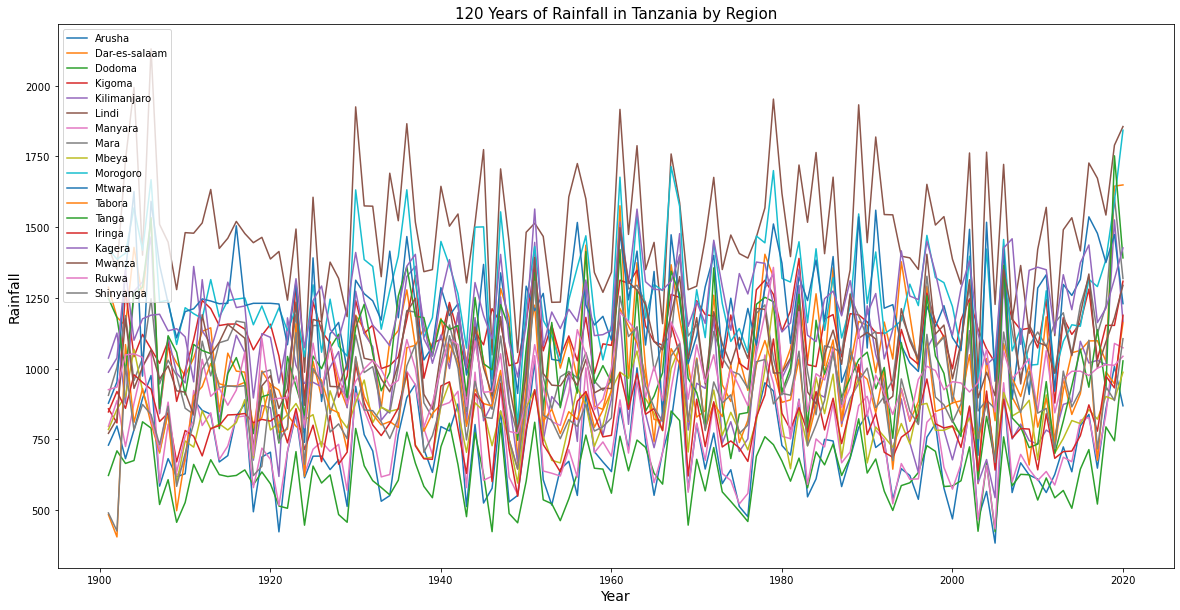

In [7]:
#Plotting last 120 years of precipitation by region in Tanzania:
plt.figure(figsize=(20,10));
plt.plot(pr_df['year'], pr_df['Arusha'], label='Arusha')
plt.plot(pr_df['year'], pr_df['Dar-es-salaam'], label='Dar-es-salaam')
plt.plot(pr_df['year'], pr_df['Dodoma'], label='Dodoma')
plt.plot(pr_df['year'], pr_df['Kigoma'], label='Kigoma')
plt.plot(pr_df['year'], pr_df['Kilimanjaro'], label='Kilimanjaro')
plt.plot(pr_df['year'], pr_df['Lindi'], label='Lindi')
plt.plot(pr_df['year'], pr_df['Manyara'], label='Manyara')
plt.plot(pr_df['year'], pr_df['Mara'], label='Mara')
plt.plot(pr_df['year'], pr_df['Mbeya'], label='Mbeya')
plt.plot(pr_df['year'], pr_df['Morogoro'], label='Morogoro')
plt.plot(pr_df['year'], pr_df['Mtwara'], label='Mtwara')
plt.plot(pr_df['year'], pr_df['Tabora'], label='Tabora')
plt.plot(pr_df['year'], pr_df['Tanga'], label='Tanga')
plt.plot(pr_df['year'], pr_df['Iringa'], label='Iringa')
plt.plot(pr_df['year'], pr_df['Kagera'], label='Kagera')
plt.plot(pr_df['year'], pr_df['Mwanza'], label='Mwanza')
plt.plot(pr_df['year'], pr_df['Rukwa'], label='Rukwa')
plt.plot(pr_df['year'], pr_df['Shinyanga'], label='Shinyanga')
plt.title('120 Years of Rainfall in Tanzania by Region', fontsize=15)
plt.ylabel('Rainfall', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend()
#plt.show()
plt.savefig('./visualizations_sb/precip_region_120.png', transparent=True, bbox_inches = 'tight')

- This plot shows precipitation by region for the past 120 years. 
- There are many highs and lows, but generally rainfall has changed very little overall in the past 120 years.

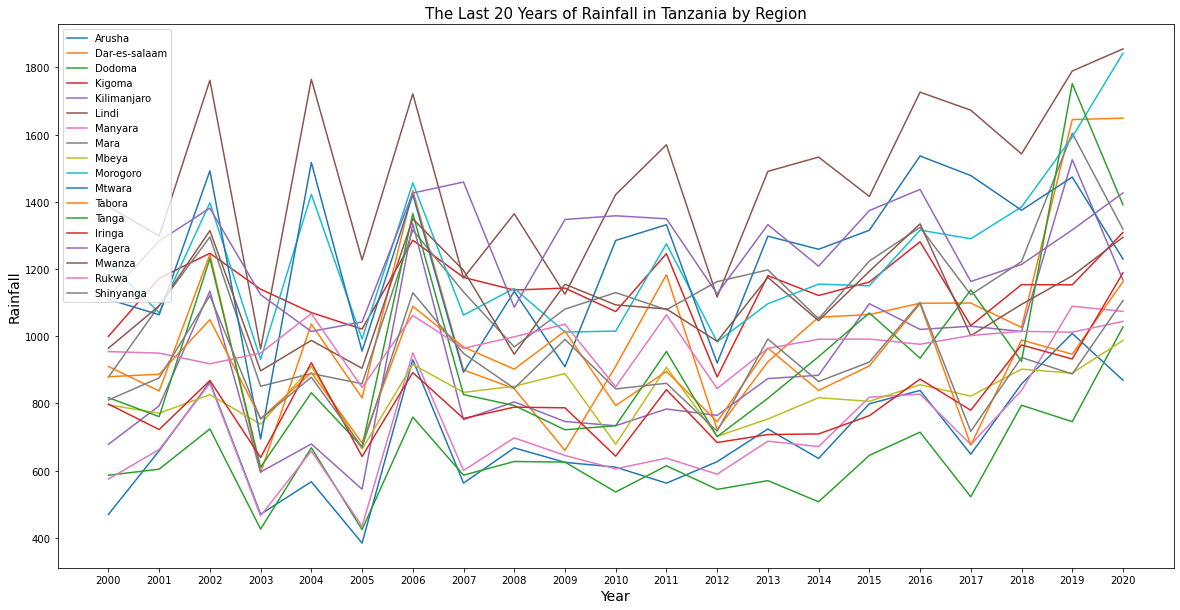

In [41]:
#Plotting last 20 years of precipitation by region in Tanzania:
plt.figure(figsize=(20,10))
plt.plot(pr_df1['year'], pr_df1['Arusha'], label='Arusha')
plt.plot(pr_df1['year'], pr_df1['Dar-es-salaam'], label='Dar-es-salaam')
plt.plot(pr_df1['year'], pr_df1['Dodoma'], label='Dodoma')
plt.plot(pr_df1['year'], pr_df1['Kigoma'], label='Kigoma')
plt.plot(pr_df1['year'], pr_df1['Kilimanjaro'], label='Kilimanjaro')
plt.plot(pr_df1['year'], pr_df1['Lindi'], label='Lindi')
plt.plot(pr_df1['year'], pr_df1['Manyara'], label='Manyara')
plt.plot(pr_df1['year'], pr_df1['Mara'], label='Mara')
plt.plot(pr_df1['year'], pr_df1['Mbeya'], label='Mbeya')
plt.plot(pr_df1['year'], pr_df1['Morogoro'], label='Morogoro')
plt.plot(pr_df1['year'], pr_df1['Mtwara'], label='Mtwara')
plt.plot(pr_df1['year'], pr_df1['Tabora'], label='Tabora')
plt.plot(pr_df1['year'], pr_df1['Tanga'], label='Tanga')
plt.plot(pr_df1['year'], pr_df1['Iringa'], label='Iringa')
plt.plot(pr_df1['year'], pr_df1['Kagera'], label='Kagera')
plt.plot(pr_df1['year'], pr_df1['Mwanza'], label='Mwanza')
plt.plot(pr_df1['year'], pr_df1['Rukwa'], label='Rukwa')
plt.plot(pr_df1['year'], pr_df1['Shinyanga'], label='Shinyanga')
plt.title('The Last 20 Years of Rainfall in Tanzania by Region', fontsize=15)
plt.ylabel('Rainfall', fontsize=14)
plt.xticks(list(pr_df1['year']))
plt.xlabel('Year', fontsize=14)
plt.legend()
plt.savefig('./visualizations_sb/precip_region_20.png', transparent=True, bbox_inches = 'tight')

- This plot shows precipitation by region for the past 20 years. 
- Some regions have more erratic variation from year to year than others do. 

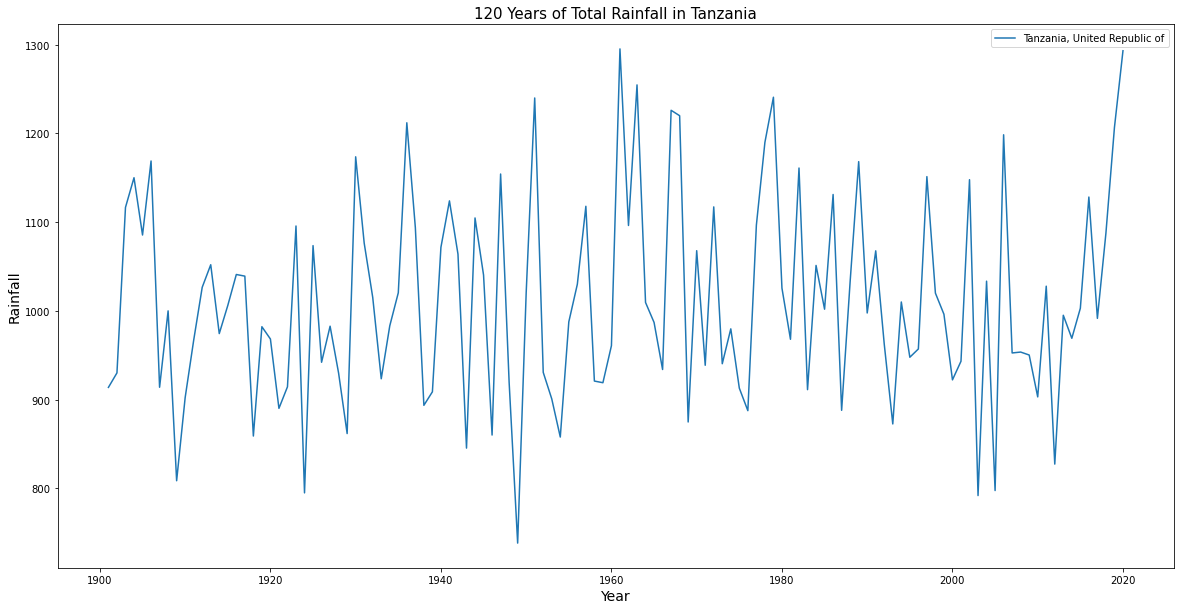

In [42]:
#Plotting last 120 years of precipitation in all of Tanzania:
plt.figure(figsize=(20,10))
plt.plot(pr_df['year'], pr_df['Tanzania, United Republic of'], label='Tanzania, United Republic of')
plt.title('120 Years of Total Rainfall in Tanzania', fontsize=15)
plt.ylabel('Rainfall', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend()
plt.savefig('./visualizations_sb/precip_all_120.png', transparent=True, bbox_inches = 'tight')

- This plot shows precipitation for the past 120 years for the entirity of Tanzania.
- There are many highs and lows, but generally little change over 120 years.

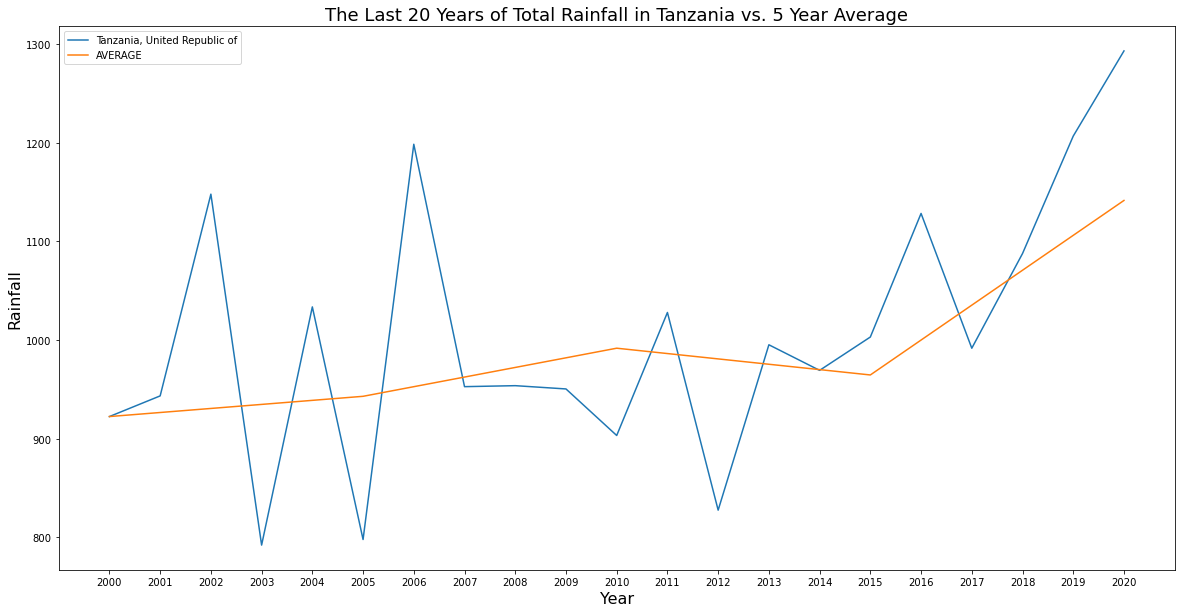

In [43]:
#Plotting last 20 years of precipitation in all of Tanzania:
plt.figure(figsize=(20,10))
plt.plot(pr_df1['year'], pr_df1['Tanzania, United Republic of'], label='Tanzania, United Republic of')
plt.plot(avg_pr_df['year'], avg_pr_df['Tanzania, United Republic of'], label='AVERAGE')
plt.title('The Last 20 Years of Total Rainfall in Tanzania vs. 5 Year Average', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(list(pr_df1['year']))
plt.legend()
plt.savefig('./visualizations_sb/precip_all_20.png', transparent=True, bbox_inches = 'tight')

- This plot shows the last 20 years of precipitation in Tanzania. 
- This shows a gradual increase in precipitation over the past 20 years.
- This is confirmed by the orange line which shows a smoothed line by using 5 year averages.

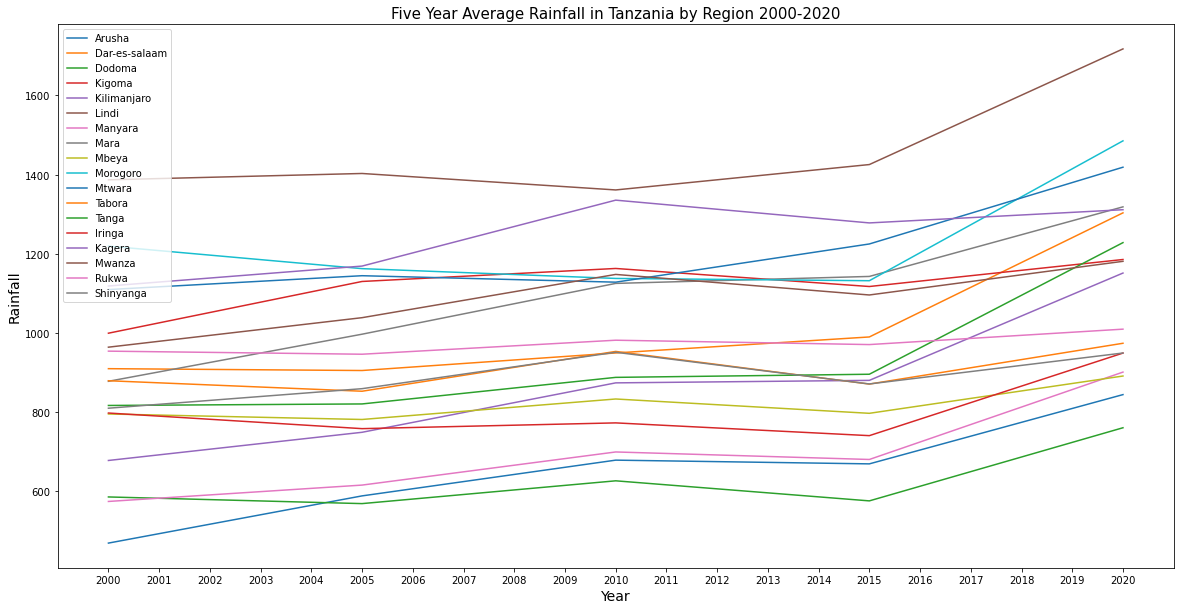

In [44]:
#Plotting precipitation by region for the past 20 years as 5 year averages:
avg_pr_df.T
plt.figure(figsize=(20,10))
plt.plot(avg_pr_df['year'], avg_pr_df['Arusha'], label='Arusha')
plt.plot(avg_pr_df['year'], avg_pr_df['Dar-es-salaam'], label='Dar-es-salaam')
plt.plot(avg_pr_df['year'], avg_pr_df['Dodoma'], label='Dodoma')
plt.plot(avg_pr_df['year'], avg_pr_df['Kigoma'], label='Kigoma')
plt.plot(avg_pr_df['year'], avg_pr_df['Kilimanjaro'], label='Kilimanjaro')
plt.plot(avg_pr_df['year'], avg_pr_df['Lindi'], label='Lindi')
plt.plot(avg_pr_df['year'], avg_pr_df['Manyara'], label='Manyara')
plt.plot(avg_pr_df['year'], avg_pr_df['Mara'], label='Mara')
plt.plot(avg_pr_df['year'], avg_pr_df['Mbeya'], label='Mbeya')
plt.plot(avg_pr_df['year'], avg_pr_df['Morogoro'], label='Morogoro')
plt.plot(avg_pr_df['year'], avg_pr_df['Mtwara'], label='Mtwara')
plt.plot(avg_pr_df['year'], avg_pr_df['Tabora'], label='Tabora')
plt.plot(avg_pr_df['year'], avg_pr_df['Tanga'], label='Tanga')
plt.plot(avg_pr_df['year'], avg_pr_df['Iringa'], label='Iringa')
plt.plot(avg_pr_df['year'], avg_pr_df['Kagera'], label='Kagera')
plt.plot(avg_pr_df['year'], avg_pr_df['Mwanza'], label='Mwanza')
plt.plot(avg_pr_df['year'], avg_pr_df['Rukwa'], label='Rukwa')
plt.plot(avg_pr_df['year'], avg_pr_df['Shinyanga'], label='Shinyanga')
plt.title('Five Year Average Rainfall in Tanzania by Region 2000-2020', fontsize=15)
plt.ylabel('Rainfall', fontsize=14)
plt.xticks(list(pr_df1['year']))
plt.xlabel('Year', fontsize=14)
plt.legend()
plt.savefig('./visualizations_sb/precip_region_20avg.png', transparent=True, bbox_inches = 'tight')

- This plot shows the last 20 years of precipitation in Tanzania by region.
- This shows a gradual increase in precipitation over the past 20 years for most regions.

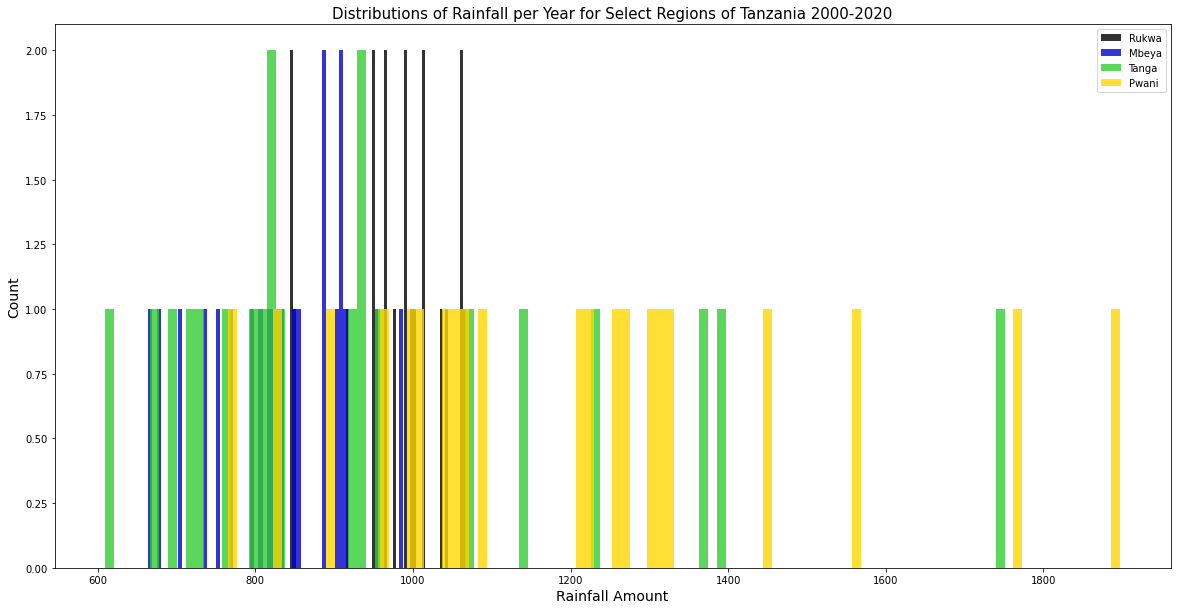

In [45]:
#Overlapping histograms of rainfall distribution for regions with largest and smallest ranges:
plt.figure(figsize=(20,10))
colors = ['black','blue', 'gold', 'red']
plt.hist(pr_df1['Rukwa'], bins=60, alpha=.8, label='Rukwa', color='black');
plt.hist(pr_df1['Mbeya'], bins=60, alpha=.8, label='Mbeya', color='mediumblue');
plt.hist(pr_df1['Tanga'], bins=100, alpha=.8, label='Tanga', color='limegreen');
plt.hist(pr_df1['Pwani'], bins=100, alpha=.8, label='Pwani', color='gold');
plt.title('Distributions of Rainfall per Year for Select Regions of Tanzania 2000-2020', fontsize=15)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Rainfall Amount', fontsize=14)
plt.legend();
plt.savefig('./visualizations_sb/precip_hist.png', transparent=True, bbox_inches = 'tight')

- This plot shows the two regions with the greastest range of precipitation and the two regions with the least range of precipitation.
- This plot confirms that those with the greatest range have years of precipitation much higher and lower than any of those experienced by regions with less range.

In [8]:
#Creating new df with:
#--Average rainfall by region...
#--Range of rainfall by region...
#--Range of upper and lower quartiles average rainfall by region...
#--Range of upper and lower halves average rainfall by region...
reg_range = pd.DataFrame()
reg_range['range'] = [pr_df1[i].max() - pr_df1[i].min() for i in list(pr_df1.drop(columns=('year')).columns)]
reg_range['avg_range_by_quartiles'] = [pr_df1[i].sort_values(ascending=False)[:5].mean() - pr_df1[i].sort_values()[:5].mean() for i in list(pr_df1.drop(columns=('year')).columns)]
reg_range['avg_range_by_halves'] = [pr_df1[i].sort_values(ascending=False)[:10].mean() - pr_df1[i].sort_values()[:10].mean() for i in list(pr_df1.drop(columns=('year')).columns)]
reg_range['avg'] = [pr_df1[i].mean() for i in list(pr_df1.drop(columns=('year')).columns)]
reg_range.index = list(pr_df1.drop(columns=('year')).columns)
reg_range['region'] = list(pr_df1.drop(columns=('year')).columns)
reg_range.to_csv('../cleaned_data_sb/region_precip_range.csv')
reg_range.sort_values('range')

,range,avg_range_by_quartiles,avg_range_by_halves,avg,region
Rukwa,223.25,172.816,107.468,975.929524,Rukwa
Mbeya,323.52,217.346,139.392,824.294286,Mbeya
Kigoma,430.39,273.504,159.485,1141.760000,Kigoma
Kagera,444.78,348.970,251.212,1265.935714,Kagera
Mwanza,452.76,358.538,238.310,1108.540952,Mwanza
Shinyanga,460.20,356.416,217.952,903.088095,Shinyanga
Singida,477.47,270.656,165.109,654.840000,Singida
Ruvuma,482.61,395.894,259.757,1229.620000,Ruvuma
Tabora,486.47,352.118,214.865,911.146190,Tabora
"Tanzania, United Republic of",501.18,346.424,211.021,1006.019524,"Tanzania, United Republic of"


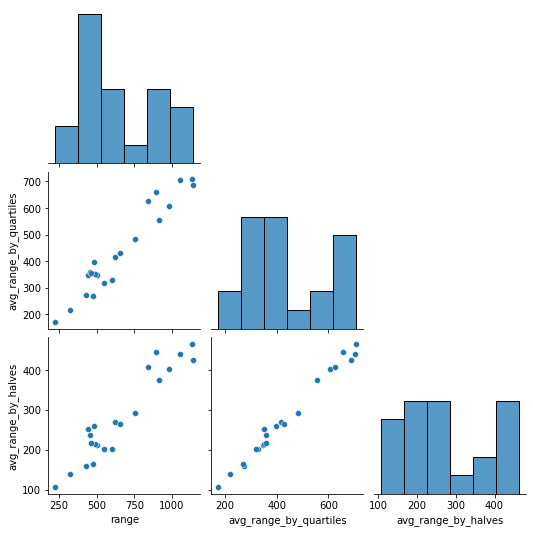

In [9]:
#Pairplotting correlation between the variables confirming strong correlation between precipitation ranges at all scales:
sns.pairplot(reg_range.drop(columns=['avg']), corner=True);

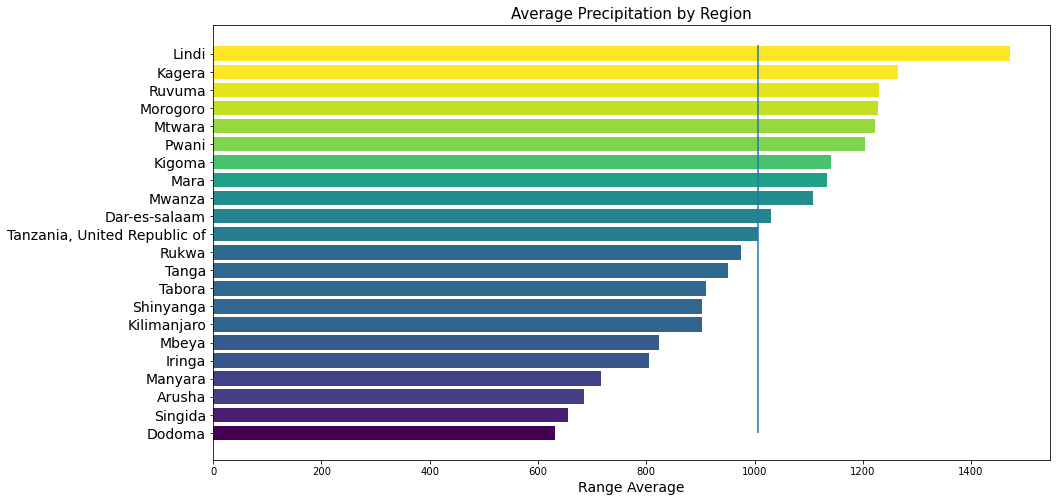

In [34]:
plt.figure(figsize=(15,8))
y = reg_range.sort_values('avg_range_by_quartiles')['avg_range_by_quartiles']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(reg_range.sort_values('avg')['region'],
         reg_range.sort_values('avg')['avg'], color=my_cmap(rescale(y)));
plt.vlines(1006, 0,21.5)
plt.title('Average Precipitation by Region', fontsize=15);
plt.xlabel('Range Average', fontsize=14);
plt.yticks(fontsize=14);
plt.savefig('./visualizations_sb/precip_region_avg.png', transparent=True, bbox_inches = 'tight')

- This plot shows the average precipitation by region for the past 20 years.
- Lindi has the highest precipitation, Dodoma has the lowest. 

###  Tanzania Census 2012 Dataset

> #### Cleaning Before EDA

In [14]:
mon_avg_rain30 = pd.read_csv('../data/pr_climatology_annual-monthly_cru_1991-2020_TZA.csv', header=1)
mon_avg_rain30 = mon_avg_rain30.rename({'Unnamed: 0': 'Region'}, axis = 1)
mon_avg_rain30.head()

,Region,Annual,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,"Tanzania, United Republic of",1003.75,154.87,136.42,178.41,154.31,61.35,12.79,5.74,7.42,16.33,34.34,90.84,150.94
1,Mtwara,1212.44,211.33,206.65,256.37,182.24,59.76,10.03,6.44,3.45,12.23,23.71,67.00,173.23
2,Morogoro,1242.33,178.71,172.91,253.21,243.72,79.00,16.77,6.98,7.04,12.07,28.06,77.96,165.89
3,Mbeya,814.66,186.13,163.99,158.22,75.17,9.33,0.52,0.14,0.05,0.47,7.38,49.27,163.98
4,Tabora,902.09,166.64,133.70,155.13,105.23,29.94,0.23,0.26,0.50,4.51,25.63,107.52,172.80


In [15]:
tz_census = pd.read_csv('../data/Tanzania_2012_en.csv')

In [16]:
regions_of_interest = mon_avg_rain30.iloc[1:, 0]
# tz_census_regions = tz_census[(tz_census['Area'] != 'Mainland') & (tz_census['Area'] != 'Tanzania')]
tz_census_regions = tz_census[tz_census['Area'].isin(regions_of_interest)] # df of indicators for regions, not whole country

In [17]:
tz_census_regions["Indicator"].value_counts()[lambda x : x.values > 250]

Primary school net enrolment ratio                          2220
Primary school gross enrolment ratio                        2052
Operators engage in crops                                   1794
Population size                                             1788
Yield in a crops                                            1740
                                                            ... 
Village land certificates issued (cummulative from 2004)     266
Children under-5 years severely stunted                      264
Projected population size                                    260
Institutional delivery rate                                  256
Children under-5 years sleeping under ITN nets               256
Name: Indicator, Length: 99, dtype: int64

In [18]:
region_cols = '''Yield in a crops
Water produced in urban water supply authority
Water demand
Water coverage
Urine protein?
Source of improved drinking water by households
Source of non improved drinking water by households
Quantity sold in a crops
Quantity harvested in crops
Projected infant mortality rate
Projected life expectancy at birth
Population with disability
Post neonatal mortality rate
Population with access to piped or protected water as their main source in regional centres
Population using an improved drinking water source
Population 7 years and above, with difficulty in cognition
Population 7 years and above, with difficulty in communication
Population 7 years and above, with difficulty in hearing
Population 7 years and above, with difficulty in mobility
Population 7 years and above, with difficulty in seeing
Planted area
Planted area in a crops
Improved water source
Income inequality
Human development index
Households within 1 km of drinking water in dry seasons
Households within 15 minutes to water supply in dry seasons
Households with access to safe drinking water during the dry season
Households with access to safe drinking water during the rainy season
Households with basic sanitation facilities
Households with a piped water
Health insurance coverage age 15-49
Health worker density per 10,000 population- (Clinicians=MO,AMO and CO)
Health worker density per 10,000 population-nurse and midwife
GINI coefficient
GDP per capita (at current prices)
Food crop production - bambaranut
Food crop production - bananas
Food crop production - barley
Food crop production - beans
Food crop production - bulrush millet
Food crop production - cassava
Food crop production - chickpeas
Food crop production - cowpeas
Food crop production - finger millet
Food crop production - irish potatos
Food crop production - maize
Food crop production - peagionpeas
Food crop production - rice
Food crop production - sorghum
Food crop production - sweetpotato
Food crop production - wheat
Food crop production -paddy
Distribution of children of age 5-17 years in child labour in agriculture, forestry and fishing industry
Distribution of children of age 5-17 years in hazardous work in agriculture, forestry and fishing industry
Distribution of children of age 5-17 years working in agriculture, forestry and fishing economic activities
Deworming coverage
Children under-5 years with diarrhoea
Children under-5 years with diarrhoea taken to a health facility/provider
Children under-5 years who drink more fluids during diarrhoea
Children under-5 years who given ORS and zinc during diarrhoea
Children under-5 years who receive any ORT for diarrhoea
Children under-5 years with fever'''.split('\n')

In [19]:
all_indicator_cols = '''Yield in a crops
Water produced in urban water supply authority
Water demand
Water coverage
Urine protein?
Source of improved drinking water by households
Source of non improved drinking water by households
Quantity sold in a crops
Quantity harvested in crops
Projected infant mortality rate
Projected life expectancy at birth
Population with disability
Post neonatal mortality rate
Population with access to piped or protected water as their main source in regional centres
Population using an improved drinking water source
Population 7 years and above, with difficulty in cognition
Population 7 years and above, with difficulty in communication
Population 7 years and above, with difficulty in hearing
Population 7 years and above, with difficulty in mobility
Population 7 years and above, with difficulty in seeing
Planted area
Planted area in a crops
Improved water source
Income inequality
Human development index
Households within 1 km of drinking water in dry seasons
Households within 15 minutes to water supply in dry seasons
Households with access to safe drinking water during the dry season
Households with access to safe drinking water during the rainy season
Households with basic sanitation facilities
Households with a piped water
Health insurance coverage age 15-49
Health worker density per 10,000 population- (Clinicians=MO,AMO and CO)
Health worker density per 10,000 population-nurse and midwife
GINI coefficient
GDP per capita (at current prices)
Food crop production - bambaranut
Food crop production - bananas
Food crop production - barley
Food crop production - beans
Food crop production - bulrush millet
Food crop production - cassava
Food crop production - chickpeas
Food crop production - cowpeas
Food crop production - finger millet
Food crop production - irish potatos
Food crop production - maize
Food crop production - peagionpeas
Food crop production - rice
Food crop production - sorghum
Food crop production - sweetpotato
Food crop production - wheat
Food crop production -paddy
Distribution of children of age 5-17 years in child labour in agriculture, forestry and fishing industry
Distribution of children of age 5-17 years in hazardous work in agriculture, forestry and fishing industry
Distribution of children of age 5-17 years working in agriculture, forestry and fishing economic activities
Deworming coverage
Children under-5 years with diarrhoea
Children under-5 years with diarrhoea taken to a health facility/provider
Children under-5 years who drink more fluids during diarrhoea
Children under-5 years who given ORS and zinc during diarrhoea
Children under-5 years who receive any ORT for diarrhoea
Children under-5 years with fever'''.split('\n')

In [20]:
health_cols = '''Urine protein?
# Projected infant mortality rate
# Projected life expectancy at birth
Population with disability
# Post neonatal mortality rate
# Population 7 years and above, with difficulty in cognition
# Population 7 years and above, with difficulty in communication
# Population 7 years and above, with difficulty in hearing
# Population 7 years and above, with difficulty in mobility
# Population 7 years and above, with difficulty in seeing
# Deworming coverage
Children under-5 years with diarrhoea
# Children under-5 years with diarrhoea taken to a health facility/provider
# Children under-5 years who drink more fluids during diarrhoea
# Children under-5 years who given ORS and zinc during diarrhoea
# Children under-5 years who receive any ORT for diarrhoea
Children under-5 years with fever'''.split('\n')

health_cols = '''Population with disability
Children under-5 years with diarrhoea
Children under-5 years with fever'''.split('\n')

water_cols = '''Water produced in urban water supply authority
Water demand
Water coverage
Source of improved drinking water by households
Source of non improved drinking water by households
Population with access to piped or protected water as their main source in regional centres
Population using an improved drinking water source
Improved water source
Households within 1 km of drinking water in dry seasons
Households within 15 minutes to water supply in dry seasons
Households with access to safe drinking water during the dry season
Households with access to safe drinking water during the rainy season
Households with a piped water'''.split('\n')

socioecon_cols = '''Income inequality
Human development index
Households with basic sanitation facilities
Health insurance coverage age 15-49
Health worker density per 10,000 population- (Clinicians=MO,AMO and CO)
Health worker density per 10,000 population-nurse and midwife
GDP per capita (at current prices)'''.split('\n')

agriculture_cols = '''Yield in a crops
Planted area
Planted area in a crops
Food crop production - bambaranut
Food crop production - bananas
Food crop production - barley
Food crop production - beans
Food crop production - bulrush millet
Food crop production - cassava
Food crop production - chickpeas
Food crop production - cowpeas
Food crop production - finger millet
Food crop production - irish potatos
Food crop production - maize
Food crop production - peagionpeas
Food crop production - rice
Food crop production - sorghum
Food crop production - sweetpotato
Food crop production - wheat
Food crop production -paddy
Quantity sold in a crops
Quantity harvested in crops
Distribution of children of age 5-17 years in child labour in agriculture, forestry and fishing industry
Distribution of children of age 5-17 years in hazardous work in agriculture, forestry and fishing industry
Distribution of children of age 5-17 years working in agriculture, forestry and fishing economic activities'''.split('\n')

agriculture_cols_smaller = '''Yield in a crops
Planted area
Planted area in a crops
Quantity sold in a crops
Quantity harvested in crops'''.split('\n')

#### Exporting cleaned, separated data into different cleaned CSVs

In [21]:
cols_tuples = [('health', health_cols), ('water', water_cols), ('socioecon', socioecon_cols), ('agriculture', agriculture_cols_smaller)]

for tup in cols_tuples:
    tz_census_regions[tz_census_regions['Indicator'].isin(tup[1])].to_csv('../data/tz_regions_' + tup[0] + '.csv')